[![University of Information Technology and Management in Rzeszow, Poland](https://gitlab.wsiz.pl/acousticlab/ml/-/raw/master/wsiz_eng.png)](wsiz_eng.png)

# Laboratory 4 Time series

[1] Satish Gunjal, Tutorial: Time Series Analysis and Forecasting. https://www.kaggle.com/code/satishgunjal/tutorial-time-series-analysis-and-forecasting

[2] Air Passenger dataset https://raw.githubusercontent.com/satishgunjal/datasets/master/Time_Series_AirPassengers.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
from pylab import rcParams

# Set plot size 
rcParams['figure.figsize'] = 10, 6

### 1. Readin the dataset, decomposition

Read the dataset

In [3]:
df = pd.read_csv('Time_Series_AirPassengers.csv')
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (144, 2)
Column datatypes= 
 Month         object
Passengers     int64
dtype: object


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


a) Use Month as an index

In [4]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Passengers    int64
dtype: object


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


b) plot the data

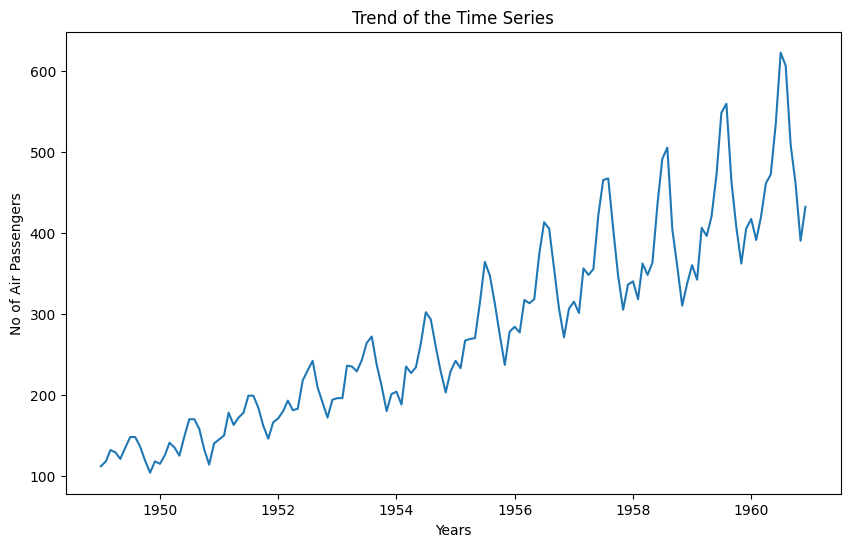

In [5]:
plt.figure(figsize= (10,6))
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')
plt.plot(df)

c) Seasonality plot

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Passengers'>

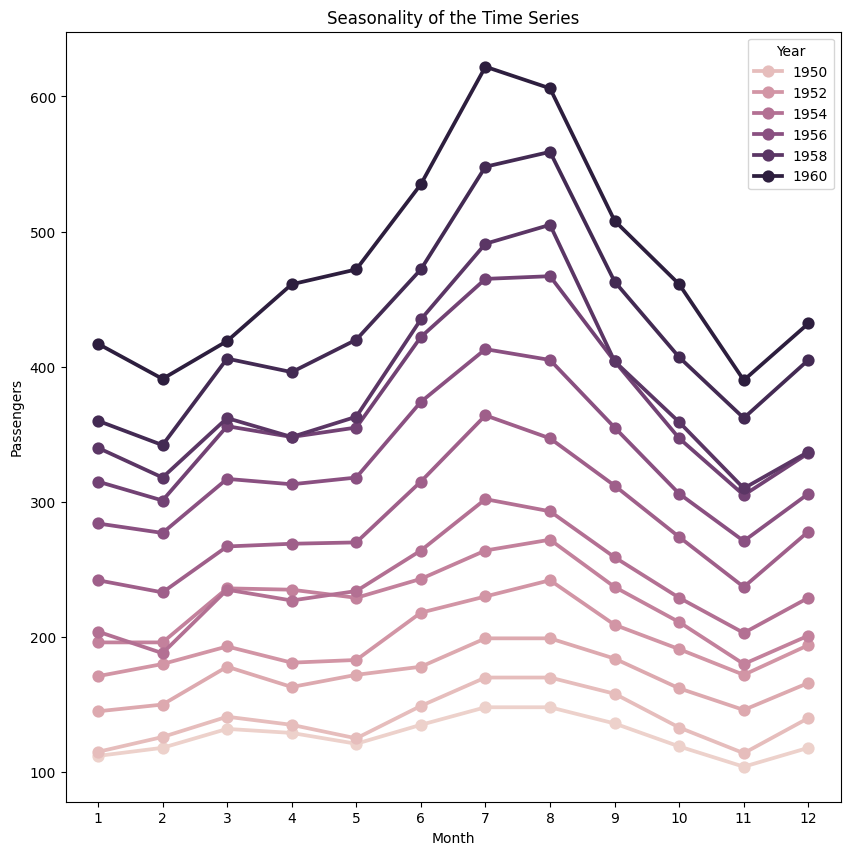

In [6]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

d) decompose - use additive model

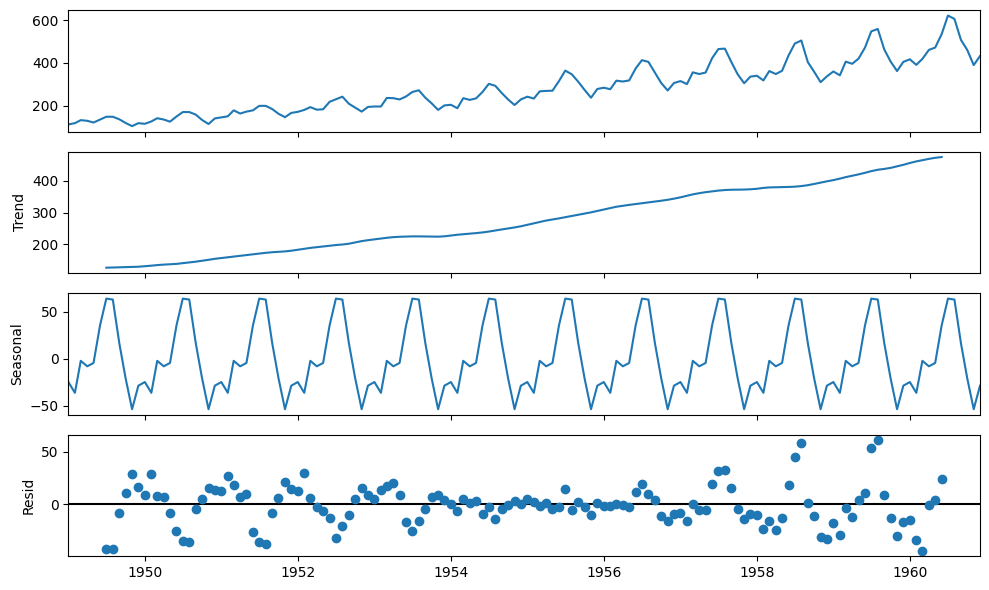

In [7]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

### 2. Stationary parameters. Transforms.

Extract stationary parameters. For each stage we will do stationarity test.

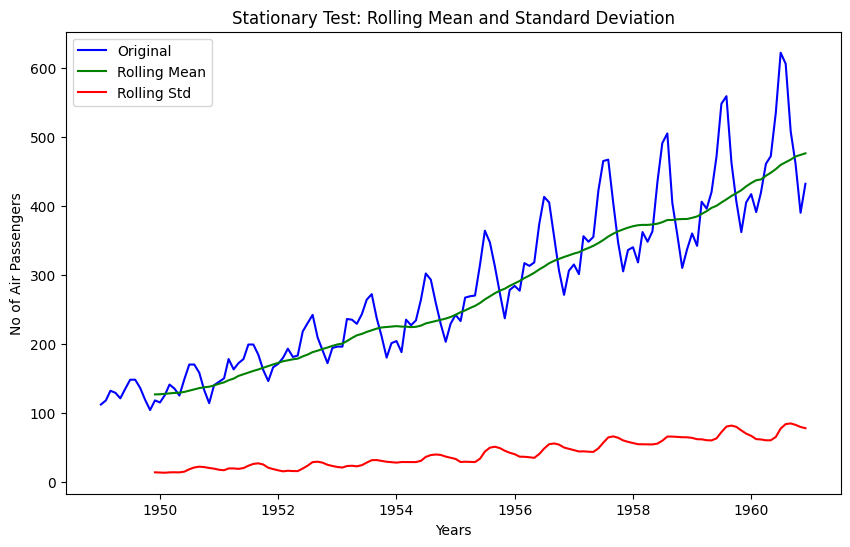

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)
    
# Lets test the stationarity score with original series data
stationarity_test(df)

a) Use differences. Plot the data. Perform stationarity test `

In [9]:
df_diff = df.diff(periods = 1) 
df_diff.dropna(inplace = True)# Data transformation may add na values

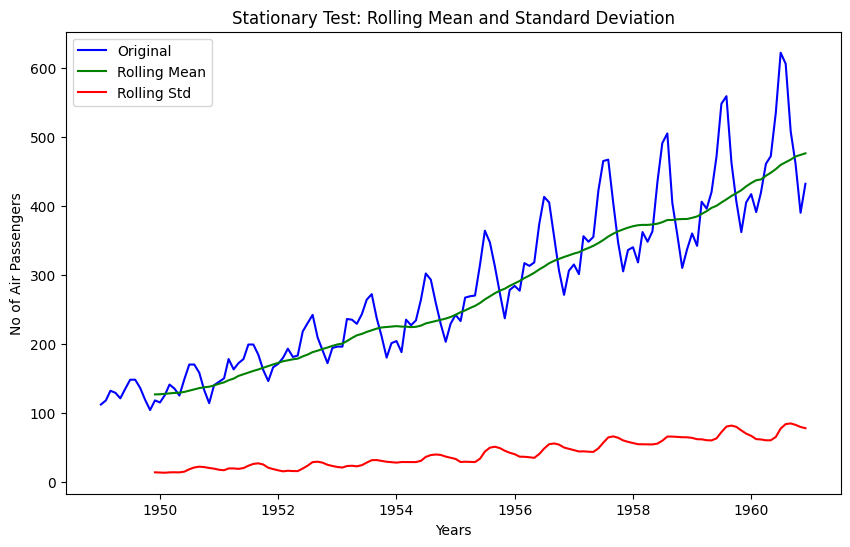

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


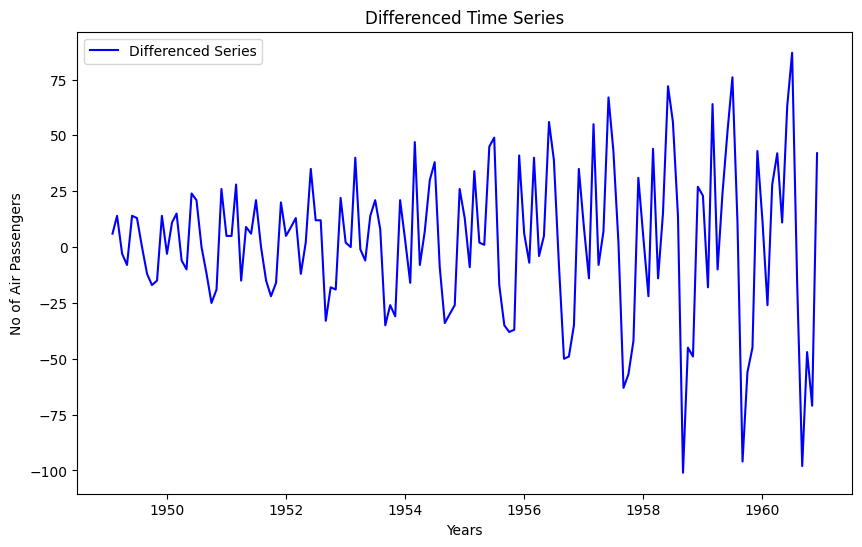

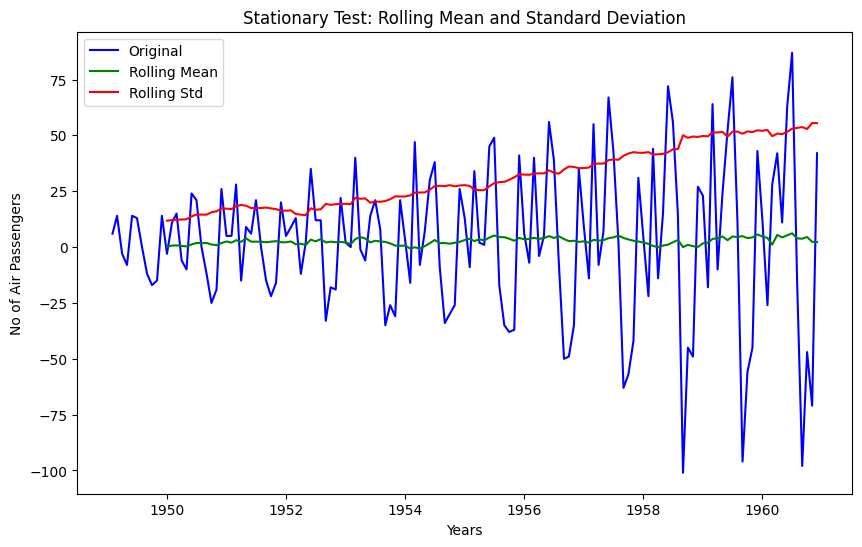

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


def stationarity_test(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='green', label='Rolling Mean')
    plt.plot(rolling_std, color='red', label='Rolling Std')   
    plt.legend()
    plt.show()
    

    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output[f'Critical Value ({key})'] = value
    print(df_output)


df = pd.read_csv('Time_Series_AirPassengers.csv', index_col='Month', parse_dates=True)


stationarity_test(df)


df_diff = df.diff(periods=1) 
df_diff.dropna(inplace=True)  


plt.figure(figsize=(10,6))
plt.plot(df_diff, color='blue', label='Differenced Series')
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Differenced Time Series')
plt.legend()
plt.show()


stationarity_test(df_diff)


b) Note that variance is proportional to trend value compare logarithm value. To get back the scale use ` exp(df_log)`

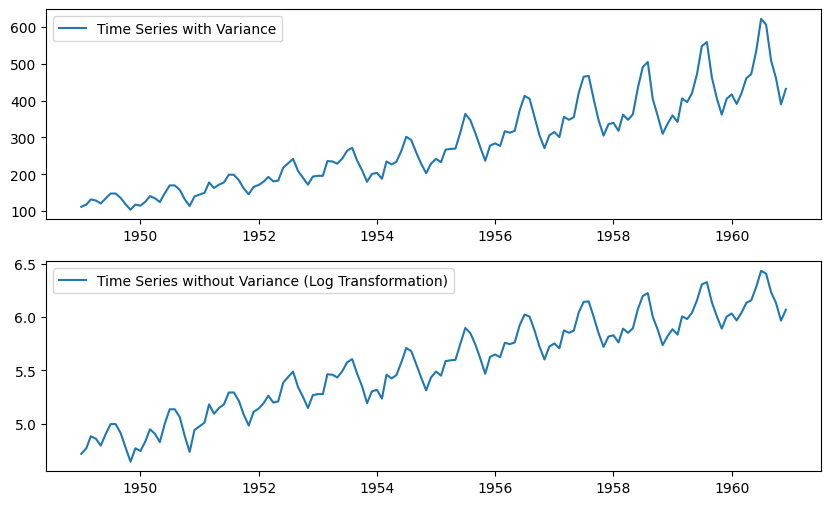

In [21]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

/tmp/ipykernel_2143045/4124761701.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')


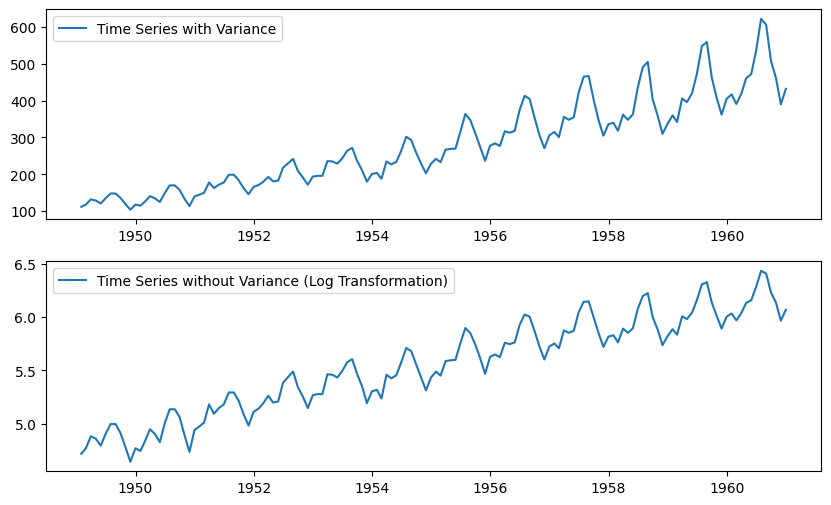

Month
1949-01-31    112.0
1949-02-28    118.0
1949-03-31    132.0
1949-04-30    129.0
1949-05-31    121.0
Name: Passengers, dtype: float64


In [42]:
df['Month'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)


df_log = np.log(df['Passengers'])


plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot(df['Passengers'], label='Time Series with Variance')
plt.legend()

plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()

plt.show()


df_exp = np.exp(df_log)


print(df_exp.head()) 

c) Now again use differences and perform stationarity test

/tmp/ipykernel_2143045/599738863.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')


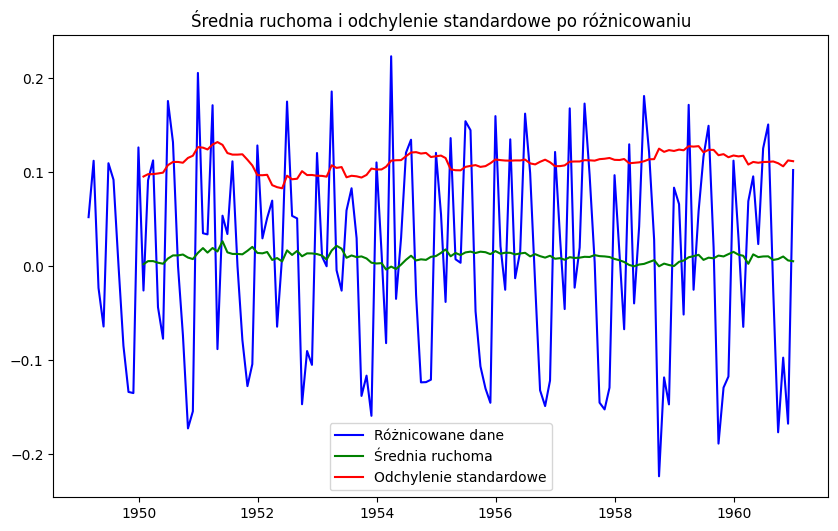

Wyniki testu Dickeya-Fullera:
Statystyka testu            -2.717131
p-wartość                    0.071121
Liczba opóźnień             14.000000
Liczba obserwacji          128.000000
Wartość krytyczna (1%)      -3.482501
Wartość krytyczna (5%)      -2.884398
Wartość krytyczna (10%)     -2.578960
dtype: float64
 Szereg czasowy **NIE** jest stacjonarny.


In [43]:


df['Month'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)


df_log = np.log(df['Passengers'])


df_log_diff = df_log.diff(periods=1)  
df_log_diff.dropna(inplace=True)  


plt.figure(figsize=(10,6))
plt.plot(df_log_diff, color='blue', label='Różnicowane dane')
plt.plot(df_log_diff.rolling(window=12).mean(), color='green', label='Średnia ruchoma')
plt.plot(df_log_diff.rolling(window=12).std(), color='red', label='Odchylenie standardowe')
plt.title('Średnia ruchoma i odchylenie standardowe po różnicowaniu')
plt.legend()
plt.show()


print('Wyniki testu Dickeya-Fullera:')
df_test = adfuller(df_log_diff)
df_output = pd.Series(df_test[0:4], index=['Statystyka testu', 'p-wartość', 'Liczba opóźnień', 'Liczba obserwacji'])


for key, value in df_test[4].items():
    df_output[f'Wartość krytyczna ({key})'] = value
    
print(df_output)


if df_output['p-wartość'] > 0.05:
    print(" Szereg czasowy **NIE** jest stacjonarny.")
else:
    print(" Szereg czasowy jest **stacjonarny**.")


In [22]:
#write differences as df_log_diff (will be needed in 3.Prediction)

p-value > 0.05 means not stationarity series it is. What about rolling mean and variance?

c) Use Moving averages, add data plot (`df_log`).

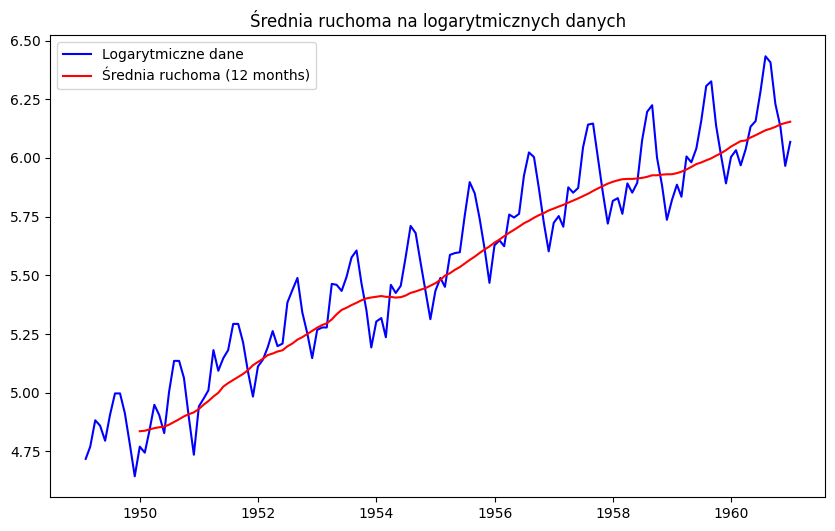

In [44]:

df_log_ma = df_log.rolling(window=12).mean()


plt.figure(figsize=(10,6))
plt.plot(df_log, color='blue', label='Logarytmiczne dane')
plt.plot(df_log_ma, color='red', label='Średnia ruchoma (12 months)')
plt.title('Średnia ruchoma na logarytmicznych danych')
plt.legend()
plt.show()


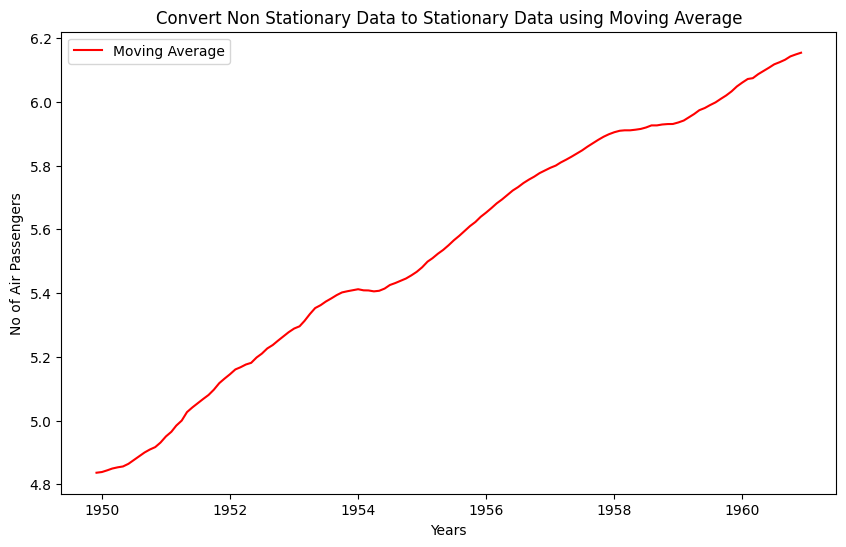

In [23]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

Calculate difference between log data and log moving average. Check stationarity. 

In [24]:
df_log_moving_avg_diff = df_log - df_log_moving_avg

p-value is less than 0.05 that means our series is stationary, but we can only say this with 95% of confidence, as test statistics is less than 5% critical value.

d) Use Weighted Moving Average (WMA). I introduce amount of exponential decay. Check stationarity similar as above (subtract weighted moving average). 

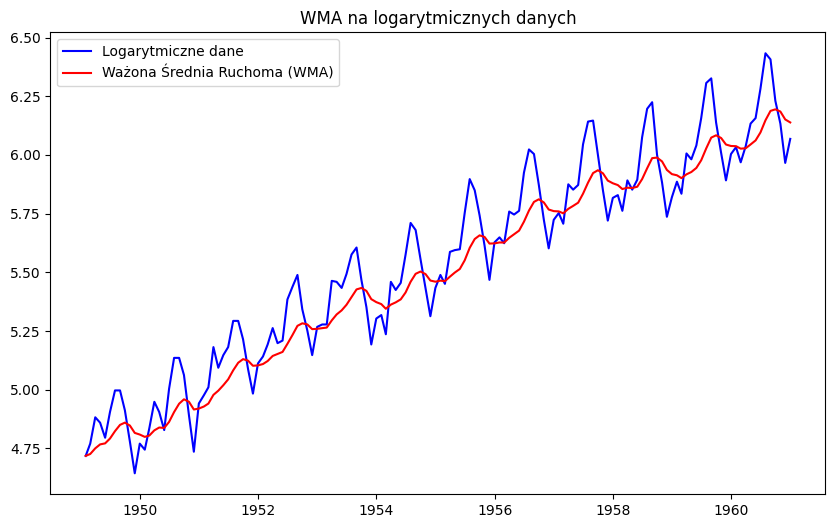

Wyniki testu Dickeya-Fullera:
Statystyka testu            -2.748983
p-wartość                    0.065939
Liczba opóźnień             13.000000
Liczba obserwacji          130.000000
Wartość krytyczna (1%)      -3.481682
Wartość krytyczna (5%)      -2.884042
Wartość krytyczna (10%)     -2.578770
dtype: float64
 Szereg czasowy **NIE** jest stacjonarny.


In [45]:


df_log_wma = df_log.ewm(span=12, adjust=False).mean()


plt.figure(figsize=(10,6))
plt.plot(df_log, label='Logarytmiczne dane', color='blue')
plt.plot(df_log_wma, label='Ważona Średnia Ruchoma (WMA)', color='red')
plt.title('WMA na logarytmicznych danych')
plt.legend()
plt.show()


df_log_wma_diff = df_log - df_log_wma
df_log_wma_diff.dropna(inplace=True)


print('Wyniki testu Dickeya-Fullera:')
df_test = adfuller(df_log_wma_diff)
df_output = pd.Series(df_test[0:4], index=['Statystyka testu', 'p-wartość', 'Liczba opóźnień', 'Liczba obserwacji'])


for key, value in df_test[4].items():
    df_output[f'Wartość krytyczna ({key})'] = value
    
print(df_output)


if df_output['p-wartość'] > 0.05:
    print(" Szereg czasowy **NIE** jest stacjonarny.")
else:
    print(" Szereg czasowy jest **stacjonarny**.")


In [25]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()

e) Do seasonal decomposition as earlier but on log data. Take residual part to check stationarity. Does statistics says that time series is stationary? (confidence, statistic, critical value)

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


residual = seasonal_decompose(df_log, model='additive', period=12).resid
residual.dropna(inplace=True) 


print('Wyniki testu Dickeya-Fullera:')
df_test = adfuller(residual)
df_output = pd.Series(df_test[0:4], index=['Statystyka testu', 'p-wartość', 'Liczba opóźnień', 'Liczba obserwacji'])


for key, value in df_test[4].items():
    df_output[f'Wartość krytyczna ({key})'] = value
    
print(df_output)


print("Szereg jest stacjonarny!" if df_output['p-wartość'] <= 0.05 else " Szereg NIE jest stacjonarny.")


Wyniki testu Dickeya-Fullera:
Statystyka testu          -6.332387e+00
p-wartość                  2.885059e-08
Liczba opóźnień            9.000000e+00
Liczba obserwacji          1.220000e+02
Wartość krytyczna (1%)    -3.485122e+00
Wartość krytyczna (5%)    -2.885538e+00
Wartość krytyczna (10%)   -2.579569e+00
dtype: float64
Szereg jest stacjonarny!


In [26]:
df_log_residual = decomposition.resid

### 3. Prediction

ACF and PACF Plots

 - To figure out the order of AR model(p) we will use PACF function. p = the lag value where the PACF chart crosses the upper confidence interval for the first time
 - To figure out the order of MA model(q) we will use ACF function. q = the lag value where the ACF chart crosses the upper confidence interval for the first time


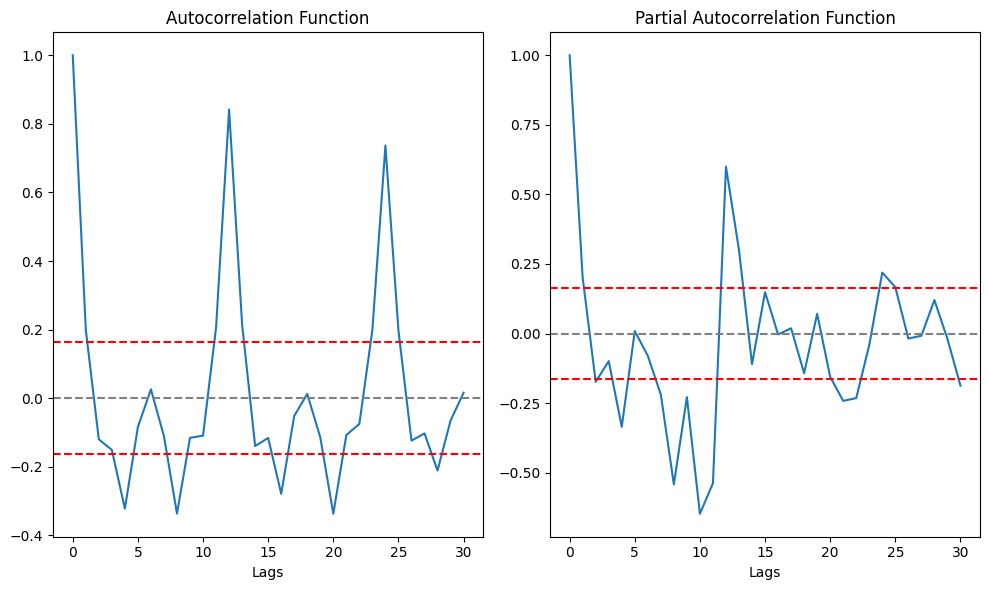

In [27]:
df_log_diff = df_log.diff(periods = 1)
df_log_diff.dropna(inplace = True)
lag_acf = acf(df_log_diff, nlags=30)
lag_pacf = pacf(df_log_diff, nlags=30, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Remember that ARIMA model uses three parameters, 'p' for the order of Auto-Regressive (AR) part, 'q' for the order of Moving Average (MA) part and 'd' for the order of integrated part. We are going to use d =1 but to find the value for p and q lets plot ACF and PACF.
 
 AR Model , now q=0

/opt/tljh/user/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'AR Model, RSS: 23.7781')

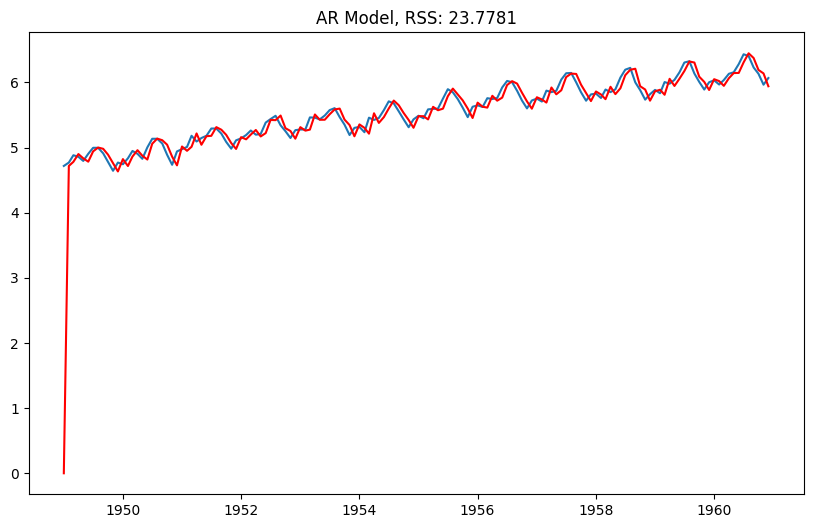

In [28]:
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use
model = ARIMA(df_log, order=(2, 1, 0), freq = 'MS')  
results_AR = model.fit()#disp= -1)# If disp < 0 convergence information will not be printed
plt.plot(df_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - df_log['Passengers']).dropna()**2))



MA model, use p=0, q=2, d=1

Combined model , use p=2,d=1, q=2

Prediction and reverse transform

In [29]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

NameError: name 'results_ARIMA' is not defined

Since we are using first order of differencing(d =1), there is no prediction available for first value (1949-02-01) of original series. In order to remove 'differencing transformation' from the prediction values we are going to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. We are going to use pandas cumsum() function for it.

In [30]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()


NameError: name 'predictions_diff' is not defined

In [31]:
# Above values once added to the base number will completely remove the differencing transformation. For this, lets create a series with all values as base number and add the 'predictions_diff_cumsum' to it.
predictions_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

NameError: name 'predictions_diff_cumsum' is not defined

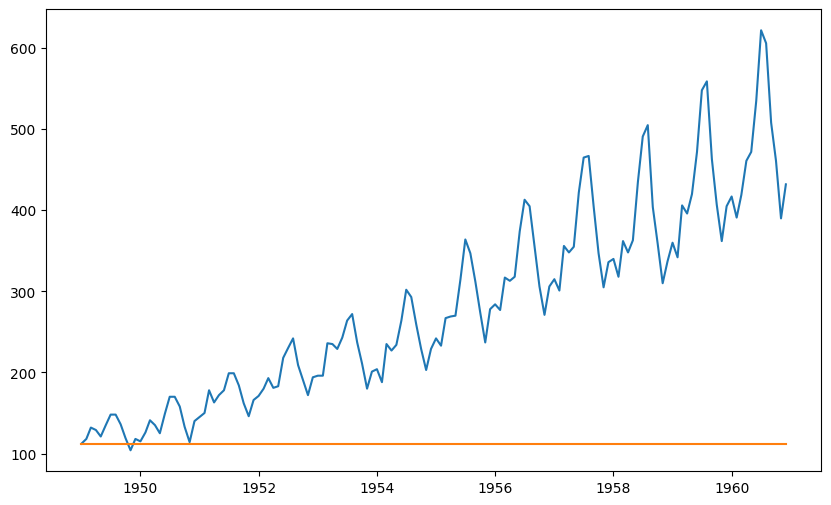

In [32]:
# Remove log transform
predictions = np.exp(predictions_log)
plt.plot(df)
plt.plot(predictions)



In [33]:
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1).T

Month,1949-01-01,1949-02-01,1949-03-01,1949-04-01,1949-05-01,1949-06-01,1949-07-01,1949-08-01,1949-09-01,1949-10-01,...,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01
Passengers,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,...,419.0,461.0,472.0,535.0,622.0,606.0,508.0,461.0,390.0,432.0
Predicted Values,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,...,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0


In [34]:
plot_predict(results_ARIMA,start = 1, end= 204) 

NameError: name 'results_ARIMA' is not defined

In [35]:
# Forecasted values in original scale will be
forecast_values_log_scale = results_ARIMA.forecast(steps = 60)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("1961-01-01", "1965-12-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Month'] = forecast_date_range

df_forecast[['Month', 'Forecast']]

NameError: name 'results_ARIMA' is not defined

**For 70% pts :** do 2 exercises (any 2 points starting from 2.a)

**For 100% pts :** do 4 exercises